<a href="https://colab.research.google.com/github/NjoodJ/Training/blob/main/11_Sentiment_analysis_for_Arabic_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\Twitter_train.csv', sep = ',')
df.head(10)

,tweet,Label
0,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos
1,' #ميري_كرسمس كل سنة وانتم طيبين http://t.co/n...,pos
2,' و انتهى مشوار الخواجة ',neg
3,' مش عارف ابتدى مذاكره منين :/ ',neg
4,' @mskhafagi إختصروا الطريق بدلا من إختيار ال...,neg
5,' إذ خانت المرأة فهي تبحث عن الإهتمام .. و إذ ...,neg
6,' يا حبيبتي البعد ناار قلبي داب من الانتظار ♡ ',pos
7,"' """"""يا سامحك الله، من علّمك أن تكون خيبة؟"""""""" '",neg
8,' خى مالها قفلت من كل حتة كده لييه ! ',neg
9,' الناس اللى حضرت حفلات البرلمان القديم ياريت ...,neg


In [3]:
Texts = df
sentiment_clean = Texts.Label.factorize()	
sentiment_clean

(array([0, 0, 1, ..., 0, 1, 2], dtype=int64),
 Index(['pos', 'neg', 'neu'], dtype='object'))

In [4]:
Rev = Texts.tweet.values
tokenizer = Tokenizer(num_words = 5000)
df = df.dropna()
tokenizer.fit_on_texts(Rev)
size = len(tokenizer.word_index) + 1
encoded = tokenizer.texts_to_sequences(Rev)
paded_sequences = pad_sequences(encoded, maxlen = 200)


In [5]:
print(Rev[0])
print(encoded[0])

' #علمتني_الحياه أن الذين يعيشون على الأرض ليسوا ملائكة بل بشر قد يصيبوا وقد يخطئوا فلا يجوز أن أحكم على شخص من موقف واحد تعاملت معه فيه '
[1, 1267, 378, 47, 593, 2536, 11, 594, 2537, 2538, 460, 1268, 168, 2539, 814, 2540, 266, 1269, 47, 2541, 11, 815, 2, 816, 48, 2542, 817, 50, 1]


In [12]:
embedding_vector_length = 32
Model = Sequential() 
Model.add(Embedding(size, embedding_vector_length, input_length=200) )
Model.add(SpatialDropout1D(0.25))
Model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
Model.add(Dropout(0.2))
Model.add(Dense(1, activation='sigmoid')) 
Model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           391168    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 407819 (1.56 MB)
Trainable params: 407819 (1.56 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [13]:
history = Model.fit(paded_sequences,sentiment_clean[0],validation_split=0.2, epochs=30, batch_size=16)

Epoch 1/30
103/103 [==============================] - 6s 48ms/step - loss: 0.3806 - accuracy: 0.3455 - val_loss: 0.3473 - val_accuracy: 0.2670
Epoch 2/30
103/103 [==============================] - 5s 47ms/step - loss: 0.3082 - accuracy: 0.3443 - val_loss: 0.3887 - val_accuracy: 0.2670
Epoch 3/30
103/103 [==============================] - 5s 46ms/step - loss: 0.1810 - accuracy: 0.3473 - val_loss: 9.9178e-04 - val_accuracy: 0.2791
Epoch 4/30
103/103 [==============================] - 5s 46ms/step - loss: -0.0021 - accuracy: 0.4062 - val_loss: 1.1038 - val_accuracy: 0.2670
Epoch 5/30
103/103 [==============================] - 5s 46ms/step - loss: 0.5593 - accuracy: 0.3588 - val_loss: -0.0748 - val_accuracy: 0.3932
Epoch 6/30
103/103 [==============================] - 5s 46ms/step - loss: -1.5728 - accuracy: 0.5398 - val_loss: -0.8305 - val_accuracy: 0.4150
Epoch 7/30
103/103 [==============================] - 5s 46ms/step - loss: -2.0571 - accuracy: 0.5537 - val_loss: -1.2837 - val_accura

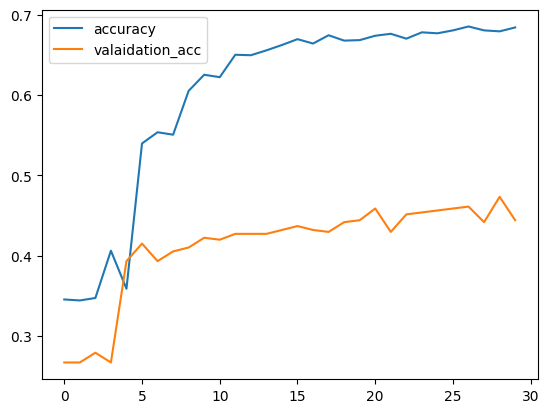

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='valaidation_acc')
plt.legend()
plt.show()

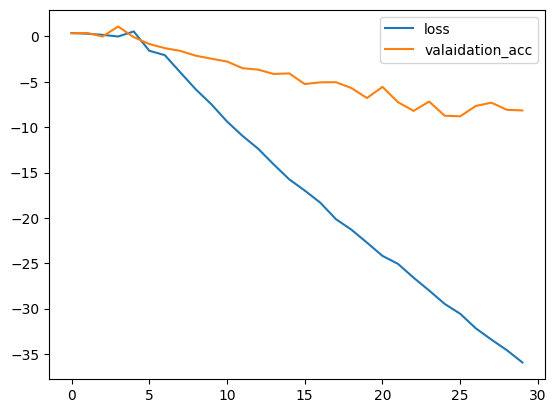

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='valaidation_acc')
plt.legend()
plt.show()

In [16]:
Test ="الجو في البداية كان كويس بس بعدين صار بارد"
tw = tokenizer.texts_to_sequences([Test])
tw

[[417, 7, 32, 245, 16, 943]]

In [17]:
tw = pad_sequences(tw,maxlen=200)
prediction = int(Model.predict(tw).round().item())
sentiment_clean[1][prediction]

1/1 [==============================] - 0s 116ms/step


'neg'